In [13]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
from pandas_profiling import ProfileReport


In [4]:
S1PATH = os.path.join('..','..','C:/Users/Mahran/Desktop/Year 3/Machine Learning/ML-Assignment1','S1_Dataset')
S2PATH = os.path.join('..','..','C:/Users/Mahran/Desktop/Year 3/Machine Learning/ML-Assignment1','S2_Dataset')
s1 = pd.DataFrame()
for filename in os.listdir(S1PATH):
    if filename != 'README.txt':
        data_path = os.path.join(S1PATH, filename)
        data=pd.read_csv(data_path, header=None)
        s1= s1.append(data, ignore_index=True)
s1.columns = ['time','frontal','vertical','lateral','id','rssi','phase','frequency','activity']
s1.head()

C:\Users\Mahran\AppData\Local\Temp\ipykernel_17084\289730679.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s1= s1.append(data, ignore_index=True)
C:\Users\Mahran\AppData\Local\Temp\ipykernel_17084\289730679.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s1= s1.append(data, ignore_index=True)
C:\Users\Mahran\AppData\Local\Temp\ipykernel_17084\289730679.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s1= s1.append(data, ignore_index=True)
C:\Users\Mahran\AppData\Local\Temp\ipykernel_17084\289730679.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s1= s1.append(data, ignore_index=True)
C:\Users\Mahran\AppData\Local\Temp\i

time  frontal  vertical   lateral  id  rssi   phase  frequency  activity
0  0.00  0.27203   1.00820 -0.082102   1 -63.5  2.4252     924.25         1
1  0.50  0.27203   1.00820 -0.082102   1 -63.0  4.7369     921.75         1
2  1.50  0.44791   0.91636 -0.013684   1 -63.5  3.0311     923.75         1
3  1.75  0.44791   0.91636 -0.013684   1 -63.0  2.0371     921.25         1
4  2.50  0.34238   0.96229 -0.059296   1 -63.5  5.8920     920.25         1

#### Data Set Information:

This dataset contains the motion data of 14 healthy older aged between 66 and 86 years old, performed broadly scripted activities using a batteryless, wearable sensor on top of their clothing at sternum level. Data is sparse and noisy due to the use of a passive sensor.
Participants were allocated in two clinical room settings (S1 and S2). The setting of S1 (Room1) uses 4 RFID reader antennas around the room (one on ceiling level, and 3 on wall level) for the collection of data, whereas the room setting S2 (Room2) uses 3 RFID reader antennas (two at ceiling level and one at wall level) for the collection of motion data.
The activities performed were:
- walking to the chair,
- sitting on the chair,
- getting off the chair,
- walking to bed,
- lying on bed,
- getting off the bed and
- walking to the door.
 ###### Hence the possible class labels assigned for every sensor observation are:
- Sitting on bed
- Sitting on chair
- Lying on bed
- Ambulating, where ambulating includes standing, walking around the room.


#### Attribute Information:

The content of the file is as follows:
Comma separated values (CSV) format.
- Column 1: Time in seconds
- Column 2: Acceleration reading in G for frontal axis
- Column 3: Acceleration reading in G for vertical axis
- Column 4: Acceleration reading in G for lateral axis
- Column 5: Id of antenna reading sensor
- Column 6: Received signal strength indicator (RSSI)
- Column 7: Phase
- Column 8: Frequency
- Column 9: Label of activity, 1: sit on bed, 2: sit on chair, 3: lying, 4: ambulating
In addition, gender of participant is included in the last character of file name eg: d1p33F (F:female).



In [5]:
s1.shape

(52482, 9)

In [6]:
s1.isna().sum()

time         0
frontal      0
vertical     0
lateral      0
id           0
rssi         0
phase        0
frequency    0
activity     0
dtype: int64

In [11]:
prof = ProfileReport(s1,title='Activity recognition with healthy older people using a batteryless wearable sensor Data Set')

In [12]:
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
s1_samp = s1.sample(n=500,random_state=2)
s1_samp

time  frontal  vertical   lateral  id  rssi    phase  frequency  \
41711  416.550  1.13970  0.020670 -0.082102   3 -56.0  6.17580     920.75   
4753   302.000  1.01070 -0.128610  0.852950   4 -59.0  0.17334     921.25   
24451   51.275  0.37756  0.939320  0.077541   1 -64.5  5.48550     920.25   
50631   55.500  0.60034  0.870420 -0.002281   1 -61.0  5.23550     922.75   
32365   94.100  0.35411  0.985260 -0.036490   1 -56.5  5.66960     923.75   
...        ...      ...       ...       ...  ..   ...      ...        ...   
38422  407.130  0.47136  0.904870 -0.013684   3 -66.5  4.35960     923.75   
11030  339.500  0.22513  0.973770  0.111750   1 -57.5  4.86270     923.25   
176     77.750  0.71760  0.893390  0.043332   4 -57.5  0.10431     924.25   
47359  254.230  1.28040 -0.025263 -0.036490   3 -57.0  6.21110     925.75   
24954  154.030  0.17823  1.042700 -0.047893   1 -60.0  5.19250     924.25   

       activity  
41711         3  
4753          3  
24451         1  
50631         1  
32365         1  
...         ...  
38422         1  
11030         1  
176           1  
47359         3  
24954         1  

[500 rows x 9 columns]

<IPython.core.display.Javascript object>


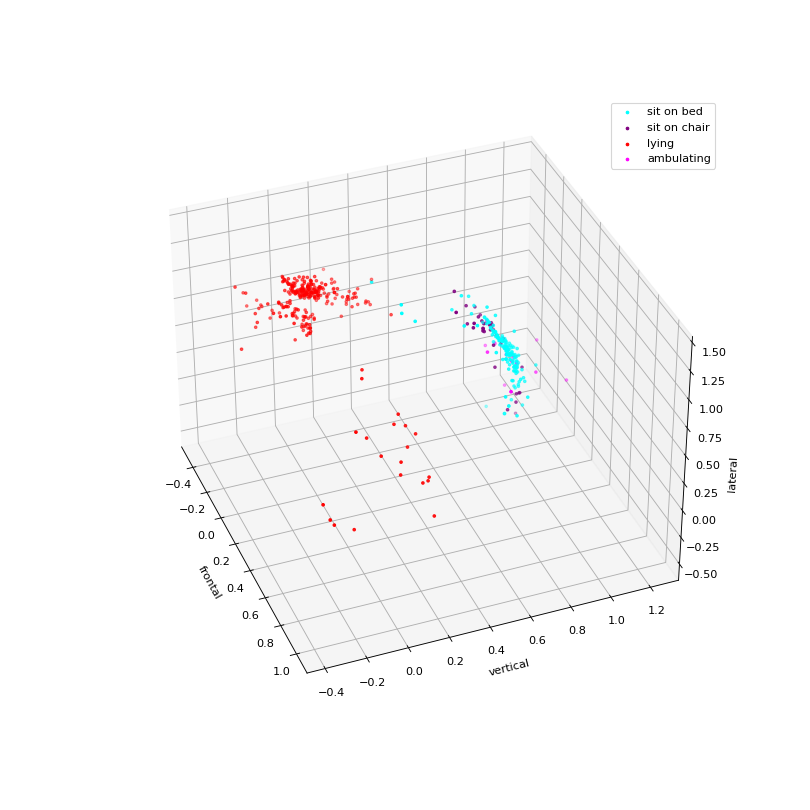

In [15]:
fig = plt.figure(figsize = (10.0,10.0))
ax= fig.add_subplot(111,projection ='3d')

#Column 9: Label of activity, 1: sit on bed, 2: sit on chair, 3: lying, 4: ambulating

cond = [(1,'#00FFFF', 'sit on bed'),(2,'#800080','sit on chair'),(3,'#FF0000', 'lying'),(4,'#FF00FF', 'ambulating')]

for x,color,action in cond:
    xs = s1_samp.loc[s1_samp["activity"] == x]['lateral']
    ys = s1_samp.loc[s1_samp['activity'] == x]['vertical']
    zs = s1_samp.loc[s1_samp['activity'] == x]['frontal']
    ax.scatter(xs, ys, zs, c=color, marker='.', label=action)

ax.legend()
ax.set_xlabel('frontal')
ax.set_ylabel('vertical')
ax.set_zlabel('lateral')


plt.show()

In [10]:
# TODO : deal with ourtliers

# SVM DT Knn